# A Machine Learning model to predict whether someone has heart disease.

### We prepare the tools required for the project

In [1]:
# Import all the tools and libraries together
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the data

In [2]:
# We read the excel sheet to a csv format
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
# We get familiar to the data and know more about the data by exploring the data (Exploratory Data Analysis).

# From the command below, we know how many sample belong to each class of the target
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
# We find more information about the dataframe we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# To check whether there are missing values

# We find that there are no missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Check whether we have duplicate values or not
duplicated_values = df.duplicated()
duplicated_values.head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [8]:
if duplicated_values.all() == 'True':
    print("Duplicated values are present")
else:
    print("No duplicated values")

No duplicated values


In [9]:
# We compare the columns inorder to find the patterns of how the features are related to the target column
# We compare sex column to target and we find that there are more males in the sample\
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# We combine this using crosstab
pd.crosstab(df["target"], df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:xlabel='target'>

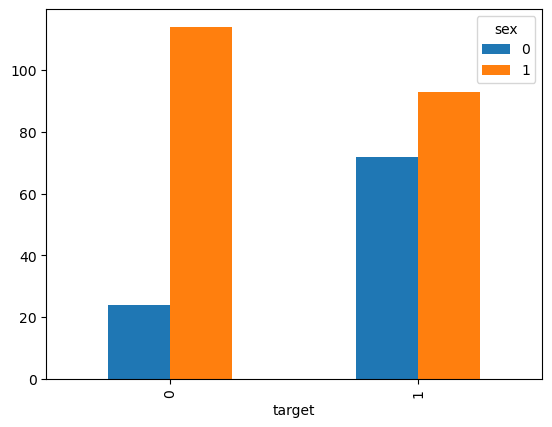

In [11]:
# We visualize using bar graph

# Using graph, we know that more males have both high and low heart diseases. But the ratio is much higher for females
pd.crosstab(df["target"], df.sex).plot(kind="bar")

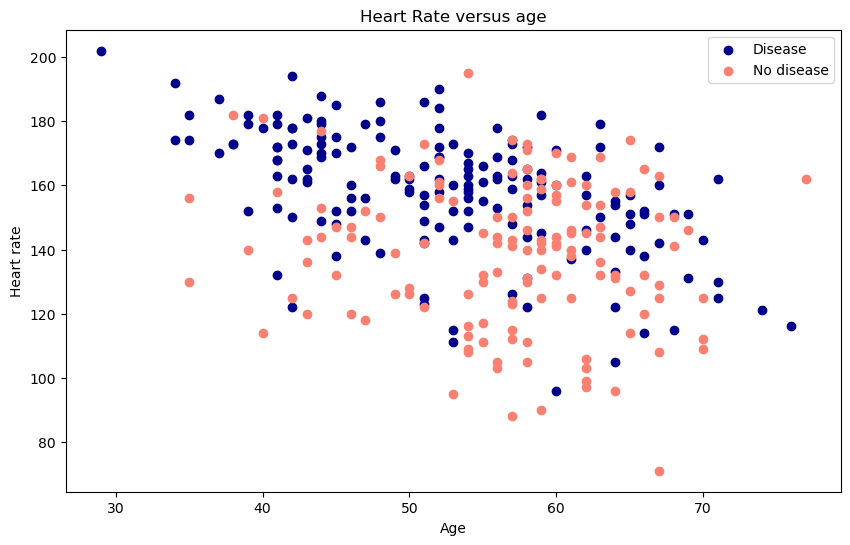

In [12]:
# Comparing Age and heart rate with target

plt.figure(figsize=(10,6))
# We use scatter plot since there are many values

# Plot values of heart disease positive sample
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="darkblue")
# Plot values of heart disease positive sample
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="salmon")

plt.title("Heart Rate versus age")
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.legend(["Disease", "No disease"])

# We see a trend where heart rate decreases as age increases

In [13]:
#  Comparing the chest pain type with target
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


<AxesSubplot:xlabel='target'>

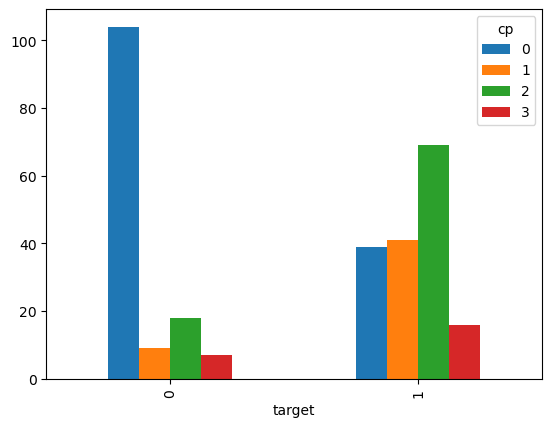

In [14]:
# Visualization
pd.crosstab(df.target, df.cp).plot(kind="bar")

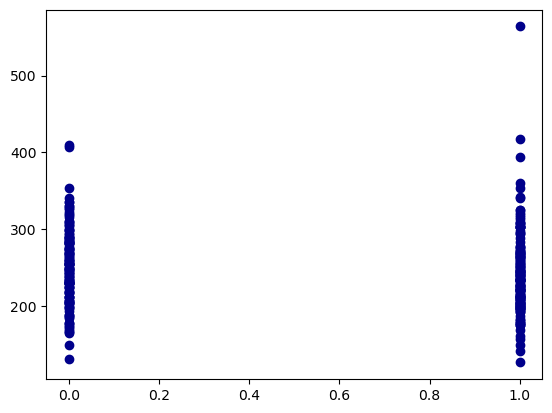

In [15]:
plt.scatter(df.target, df.chol, c='darkblue')

In [16]:
# Form a correlation matrix to see how independent variables relate with each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


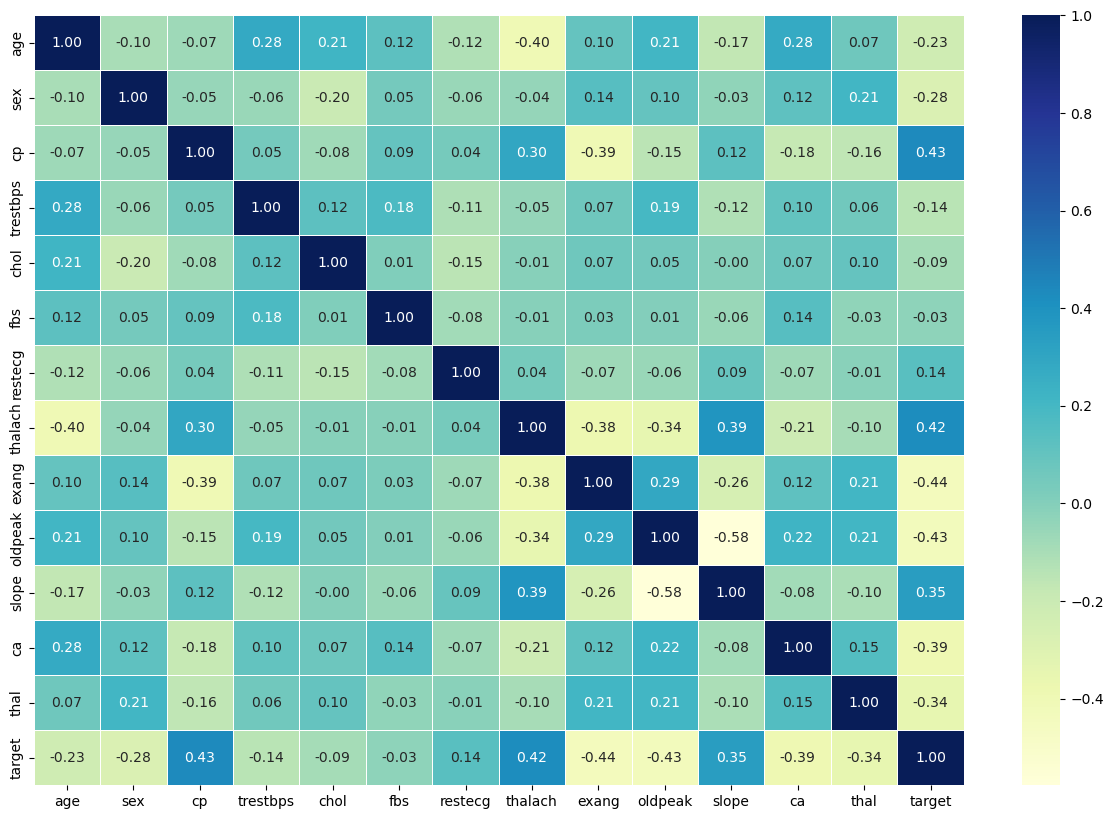

In [17]:
# Visualize this matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [18]:
# Positive correlation means as correlation value in the specific box increases, more likely that target value increase (heart disease present).
# Negative correlation means as correlation decreases, the target value decreases (more likely that there is no heart disease)


# Modelling

In [19]:
# Importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Import tools for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score


In [20]:
# Split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# We build machine learning model and choose the right one
# We try 5 different machine learning models according to the machine learning map
# Put models in a dictionary and form a function to run it
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          " Support Vector Machine": SVC(),
          " Decision Trees": DecisionTreeClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits the model and evaluates various models
    '''
    np.random.seed(30)
    # Make dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [22]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6557377049180327,
 ' Support Vector Machine': 0.6885245901639344,
 ' Decision Trees': 0.7704918032786885,
 'Random Forest Classifier': 0.8524590163934426}

In [23]:
# Above gives the baseline predictions 

# Hyperparameter tuning using RandomizedSearchCV and GridSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# We take two of the best models and perform hyperparameter tuning
# Create a hyperparameter grid for Logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for Randomforest classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 100),
           "max_depth": [None, 3, 5, 7],
           "min_samples_split": np.arange(2, 20, 20),
           "min_samples_leaf": np.arange(2, 20, 20)}


In [25]:
np.random.seed(30)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True, error_score='raise')
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
# Best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

In [28]:
# Tuning RandomForestClassifier
np.random.seed(30)
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=30), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=30),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7],
                                        'min_samples_leaf': array([2]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
                   verbose=True)

In [29]:
rs_rf.score(X_test, y_test)

0.8360655737704918

In [30]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 3}

In [31]:
# Using GridSearchCV
# Logistic regression model gives best results. So we tune it.
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True, error_score='raise')

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 29.763514416313132, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [34]:
rf_grid = {"n_estimators": np.arange(10, 1000, 100),
           "max_depth": [None, 3, 5, 7],
           "min_samples_split": np.arange(2, 20, 20),
           "min_samples_leaf": np.arange(2, 20, 20)}
gs_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=30), param_grid=rf_grid, cv=5, verbose=True)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=30),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': array([2]),
                         'min_samples_split': array([2]),
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
             verbose=True)

In [35]:
gs_rf.score(X_test, y_test)

0.8524590163934426

In [36]:
# RandomForestClassifier gives the best results
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 710}

# Evaluating the model

In [37]:
# Evaluating other than accuracy
# Make predictions
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, f1_score


y_preds = gs_rf.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


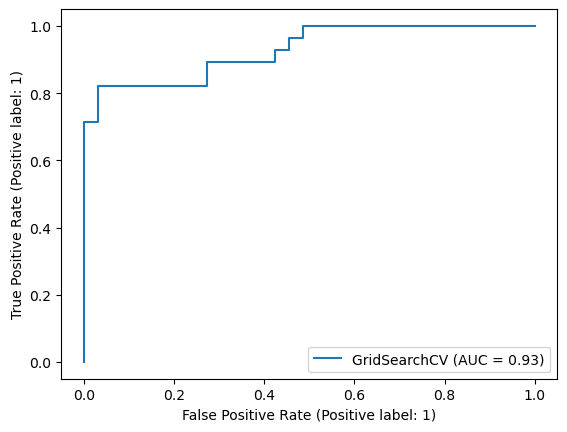

In [38]:
# Plotting ROC curve to get AUC
plot_roc_curve(gs_rf, X_test, y_test)

In [39]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[29  4]
 [ 5 23]]


Text(-1.2499999999999982, 0.5, 'True label')

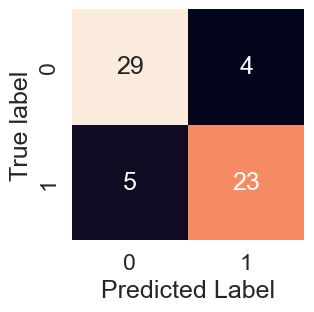

In [40]:
# Plotting
sns.set(font_scale=1.5)

#def plot_conf_mat(y_test, y_preds):
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True label")

#plot_conf_mat(y_test, y_preds)

In [41]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [53]:
# Calculating precision score, f1 score, recall using crossvalidation
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 710}

In [54]:
clf = RandomForestClassifier(n_estimators=710, min_samples_leaf=2, min_samples_split=2, max_depth=3)


In [55]:
# crossvalidated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8349180327868853

In [56]:
# crossvalidates precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8285539215686274

In [57]:
# crossvalidated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8969696969696969

In [58]:
# crossvalidated f1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8525374682152176

<AxesSubplot:title={'center':'Cross validated metrics'}>

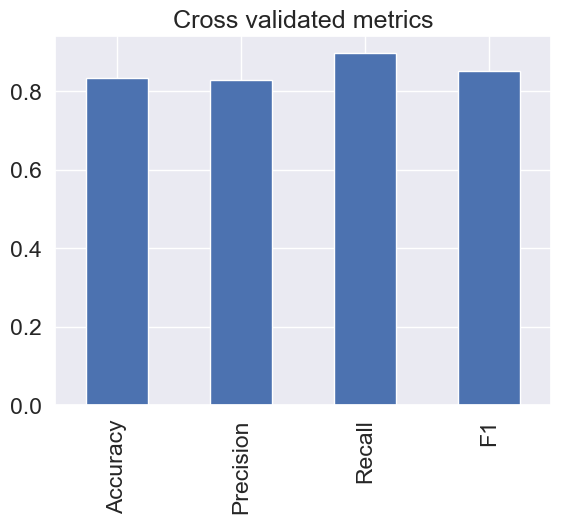

In [59]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross validated metrics", legend=False)

# Feature Importance

In [60]:
# Fit an instance of Logistic regression
#gs_rf.best_params_

clf = RandomForestClassifier(n_estimators=710, min_samples_leaf=2, min_samples_split=2, max_depth=3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=710)

In [61]:
# Check feature importances which tells how much features contribute to predicting target
clf.feature_importances_

array([0.05365642, 0.02730887, 0.18999517, 0.02741193, 0.02340043,
       0.00343638, 0.00357919, 0.1149546 , 0.05801241, 0.1189536 ,
       0.04848844, 0.15334453, 0.17745802])

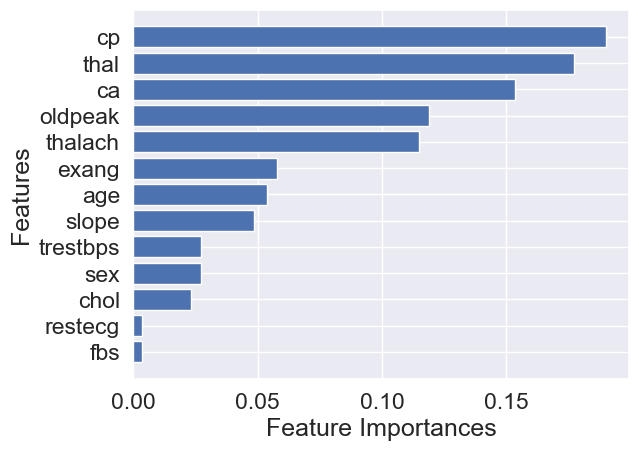

In [62]:
data_feat = pd.DataFrame({"Feature": X_train.columns,
                          "Importance": clf.feature_importances_
}).sort_values("Importance", ascending=False)

fig, ax = plt.subplots()
ax.barh(data_feat["Feature"], data_feat["Importance"])
ax.set_xlabel("Feature Importances")
ax.set_ylabel("Features")
ax.invert_yaxis()


In [52]:
# Above graph shows the features which impact the prediction.